In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
plt.style.use('ggplot')


plt.rc('font', size=20)
plt.rcParams["figure.autolayout"] = True

In [9]:
spirits = [['El Buho Espadin', 3, 0.5, 'Mezcal'],
            ['Casamigos Reposado', 1, 1, 'Mezcal'],
            ['Espolon Anejo',1.5, 2, 'Mezcal'], 
            ['Laphroaig 12', 7, 4, 'Whiskey'],
            ['Macallan 12', 5, 4, 'Whiskey'],
            ['Knob Creek Bourbon', 4, 5, 'Whiskey']]

spirits_df = pd.DataFrame(spirits, columns=['spirit','smokiness', 'color', 'type' ])

spirits_df.head(10)

,spirit,smokiness,color,type
0,El Buho Espadin,3.0,0.5,Mezcal
1,Casamigos Reposado,1.0,1.0,Mezcal
2,Espolon Anejo,1.5,2.0,Mezcal
3,Laphroaig 12,7.0,4.0,Whiskey
4,Macallan 12,5.0,4.0,Whiskey
5,Knob Creek Bourbon,4.0,5.0,Whiskey


In [ ]:
spirits_df.to_csv('spirits_1.csv', index=False)

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=spirits_df['smokiness'], x=spirits_df['color'], s=50)
plt.xlim([0, 7])
plt.ylim([0,7.5])

for i in range(spirits_df.shape[0]):
    plt.text(x=spirits_df['color'][i]+.1,
             y=spirits_df['smokiness'][i]+.1, 
             s=spirits_df['spirit'][i], 
             fontdict=dict(color='blue',size=16),
             bbox=dict(facecolor='yellow',alpha=0.5))

#plt.show()
plt.savefig('./figures/all-spirits.png')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


sns.lineplot(y=y,
                x=x)

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./figures/1-points.png')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


sns.lineplot(y=y,
                x=x)

sns.lineplot(y=[y[0], y[0]],
                x=[x[0],x[1]], color='red')

#note, adding .001 to the x value below is a hack to get around some weird
#plotting thing with vertical lines where they don't really show up
sns.lineplot(y=[y[0],y[1]],
                x=[x[1]+.001,x[1]], color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./figures/2-triange.png')

In [ ]:
#f"Hello, {name}. You are {age}."
print(f"The distance between the two points is: {round(math.dist([x[0], y[0]], [x[1], y[1]]), 2)}")

In [ ]:
print("Here is the way you would calculate the same value without using the math library: (10**2 + 15**2)**0.5")
print(f"I'll prove to you the answer is the same:")
print(f"(10**2 + 15**2)**0.5 = {round((10**2 + 15**2)**0.5, 2)}")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

x = [10, 20]
y = [5, 20]
sns.scatterplot(y=y,
                x=x , s=80)
plt.xlim([0, 25])
plt.ylim([0,25])


# sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
#                 x=[spirits_df['color'][0],spirits_df['color'][3]] )

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./figures/1-points.png')

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]] , s=50)
plt.xlim([0, 7])
plt.ylim([0,7.5])

plt.text(x=spirits_df['color'][0]+.1,
         y=spirits_df['smokiness'][0]+.1, 
         s=spirits_df['spirit'][0], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

plt.text(x=spirits_df['color'][3]+.1,
         y=spirits_df['smokiness'][3]+.1, 
         s=spirits_df['spirit'][3], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]] )

plt.xlabel('color')
plt.ylabel('smokiness')

plt.savefig('./figures/laphroaig-elbuho-points.png')


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.scatterplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3], spirits_df['smokiness'][0]],
                x=[spirits_df['color'][0],spirits_df['color'][3], spirits_df['color'][3]] , s=50)

plt.xlim([0, 7])
plt.ylim([0,7.5])

plt.text(x=spirits_df['color'][0]+.1,
         y=spirits_df['smokiness'][0]+.1, 
         s=spirits_df['spirit'][0], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.5))

plt.text(x=spirits_df['color'][3]+.1,
         y=spirits_df['smokiness'][3]+.1, 
         s=spirits_df['spirit'][3], 
         fontdict=dict(color='blue',size=16),
        bbox=dict(facecolor='yellow',alpha=0.9))

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][0],spirits_df['color'][3]], color='red' )

sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][0]],
                x=[spirits_df['color'][0],spirits_df['color'][3]], color='red')

#note, adding .001 to the x value below is a hack to get around some weird
#plotting thing with vertical lines where they don't really show up
sns.lineplot(y=[spirits_df['smokiness'][0],spirits_df['smokiness'][3]],
                x=[spirits_df['color'][3]+.001,spirits_df['color'][3]], color='red')

plt.xlabel('color')
plt.ylabel('smokiness')
plt.savefig('./figures/laphroaig-elbuho-triangle.png')

In [ ]:
print(f"The distance between El Buho and Laphroaig is: {math.dist([spirits_df['smokiness'][0],spirits_df['color'][0]], [spirits_df['smokiness'][3],spirits_df['color'][3]])}")

In [ ]:
unknown_spirit = {'spirit':'Unknown Spirit', 'smokiness':2, 'color':3}
unknown_spirit = pd.DataFrame([unknown_spirit])
                  
spirits_df_us = pd.concat([spirits_df, unknown_spirit], ignore_index=True)

spirits_df_us.to_csv('spirits_unknown_1.csv', index=False)

spirits_df_us.head(10)

In [ ]:
distances = pdist(spirits_df_us[['smokiness', 'color']].values, metric='euclidean')
dist_matrix = squareform(distances)

us_dist = pd.DataFrame(dist_matrix.round(2),
    columns = spirits_df_us.spirit.values,
    index = spirits_df_us.spirit.values
)[['Unknown']]

us_dist.sort_values('Unknown').head(10)

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches(15, 10)
# sns.scatterplot(y=spirits_df['smokiness'], x=spirits_df['color'], s=50)
# plt.xlim([0, 7])
# plt.ylim([0,7.5])


# for i in range(spirits_df.shape[0]):
#     plt.text(x=spirits_df['color'][i]+.1,
#              y=spirits_df['smokiness'][i]+.1, 
#              s=spirits_df['spirit'][i], 
#              fontdict=dict(color='blue',size=16),
#              bbox=dict(facecolor='yellow',alpha=0.5))

# plt.show()
# plt.savefig('./plots/all-spirits-unknown.png')

In [ ]:
unknown_spirit2 = {'spirit':'Unknown', 'smokiness':2.5, 'color':3}
unknown_spirit2 = pd.DataFrame([unknown_spirit2])


                  
spirits_df_us2 = pd.concat([spirits_df, unknown_spirit2], ignore_index=True)
spirits_df_us2.to_csv('spirits_unknown_2.csv', index=False)

distances2 = pdist(spirits_df_us2[['smokiness', 'color']].values, metric='euclidean')
dist_matrix2 = squareform(distances2)

us_dist2 = pd.DataFrame(dist_matrix2.round(2),
    columns = spirits_df_us2.spirit.values,
    index = spirits_df_us2.spirit.values
)[['Unknown']]

us_dist2.sort_values('Unknown').head(10)

In [ ]:
us_dist2.to_csv('distances_modified.csv')

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.rc('font', size=16)
labels = 'Training Set', 'Test Set'
sizes = [80, 20]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig('./figures/train-test.png')

In [ ]:
unknown_spirit = {'spirit':'Unknown Spirit', 'smokiness':2, 'color':3}
unknown_spirit = pd.DataFrame([unknown_spirit])

spirits_df = pd.concat([spirits_df, unknown_spirit], ignore_index=True)

labels = ['Mezcal', 'Mezcal', 'Mezcal', 'Whiskey', 'Whiskey', 'Whiskey', 'Mezcal' ]
spirits_df['type']=labels
spirits_df

In [32]:
def plot_supervised(df, uk_smokiness, uk_color, save=False):
    
    #plot params
    plt.style.use('ggplot')
    plt.rc('font', size=20)
    plt.rcParams["figure.autolayout"] = True
    plt.xlim([0, 7])
    plt.ylim([0,7.5])
    plt.legend(loc=1, prop={'size': 25})
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    
    #annoying hack to fix legend marker size
    lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=16)

    for handle in lgnd.legendHandles:
        handle.set_sizes([200])
        handle.set_color('r')
    
    #make a prediction for the uknown spirit type using knn
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(df[['smokiness', 'color']], df['type'])
    uk_type = neigh.predict([[uk_smokiness,uk_color]])[0]
    print(f'Unknown spirit type is: {uk_type}')
    
    unknown_spirit = {'spirit':'Unknown Spirit','smokiness':uk_smokiness, 'color':uk_color, 'type':uk_type}
    unknown_spirit_df = pd.DataFrame([unknown_spirit])               
    df = pd.concat([df, unknown_spirit_df], ignore_index=True)

    sns.scatterplot(y=df['smokiness'], x=df['color'], s=170, style=df['type'])
    
    for i in range(df.shape[0]):
        plt.text(x=df['color'][i]+.1,
                 y=df['smokiness'][i]+.1, 
                 s=df['spirit'][i], 
                 fontdict=dict(color='blue',size=16),
                 bbox=dict(facecolor='yellow',alpha=0.5))

    if save:
        plt.savefig('./figures/supervised-learning.png')
    else:
        plt.show()

Unknown spirit type is Mezcal


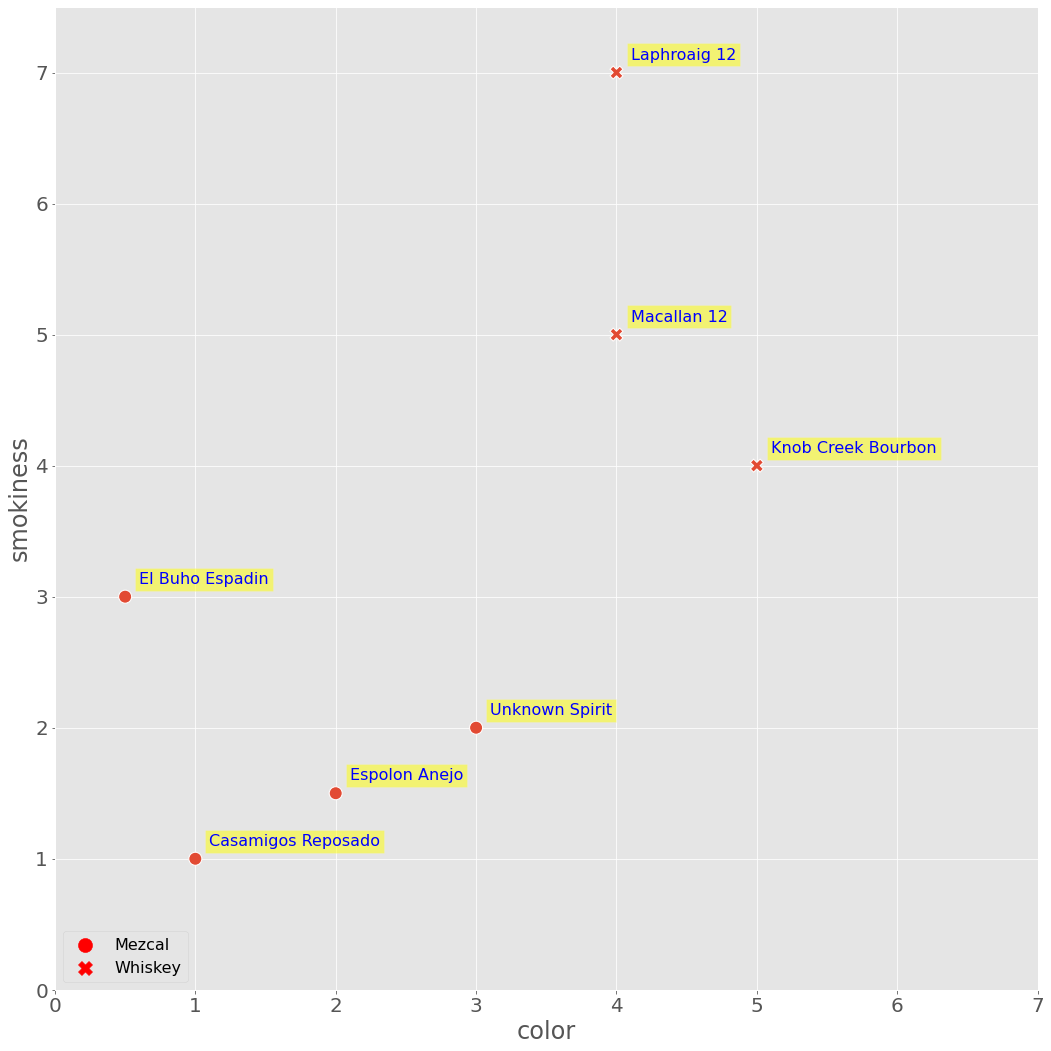

In [33]:
plot_supervised(spirits_df, uk_smokiness=2, uk_color=3)

In [45]:
def plot_unsupervised(df, uk_smokiness, uk_color, save_fig=False):
    
    #plot params
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    
    plt.xlim([0, 7])
    plt.ylim([0,7.5])

    
    unknown_spirit = {'spirit':'Unknown Spirit','smokiness':uk_smokiness, 'color':uk_color, 'type':'None'}
    unknown_spirit_df = pd.DataFrame([unknown_spirit])               
    df = pd.concat([df, unknown_spirit_df], ignore_index=True)
    
    
    means=df.groupby('type').mean()
    center_m = [means['color']['Mezcal'], means['smokiness']['Mezcal']]
    center_w = [means['color']['Whiskey'], means['smokiness']['Whiskey']]
    
    sns.scatterplot(y=df['smokiness'], x=df['color'], s=170)

    for i in range(df.shape[0]):
        plt.text(x=df['color'][i]+.1,
                 y=df['smokiness'][i]+.1, 
                 s=df['spirit'][i], 
                 fontdict=dict(color='blue',size=16),
                 bbox=dict(facecolor='yellow',alpha=0.5))

    
    ax.add_patch(plt.Circle(center_m, radius=2, color='r', alpha=0.2))
    ax.add_patch(plt.Circle(center_w, radius=2, color='b', alpha=0.2))
    
    if save_fig:
        plt.savefig('./figures/unsupervised-learning.png')
    else:
        plt.show()

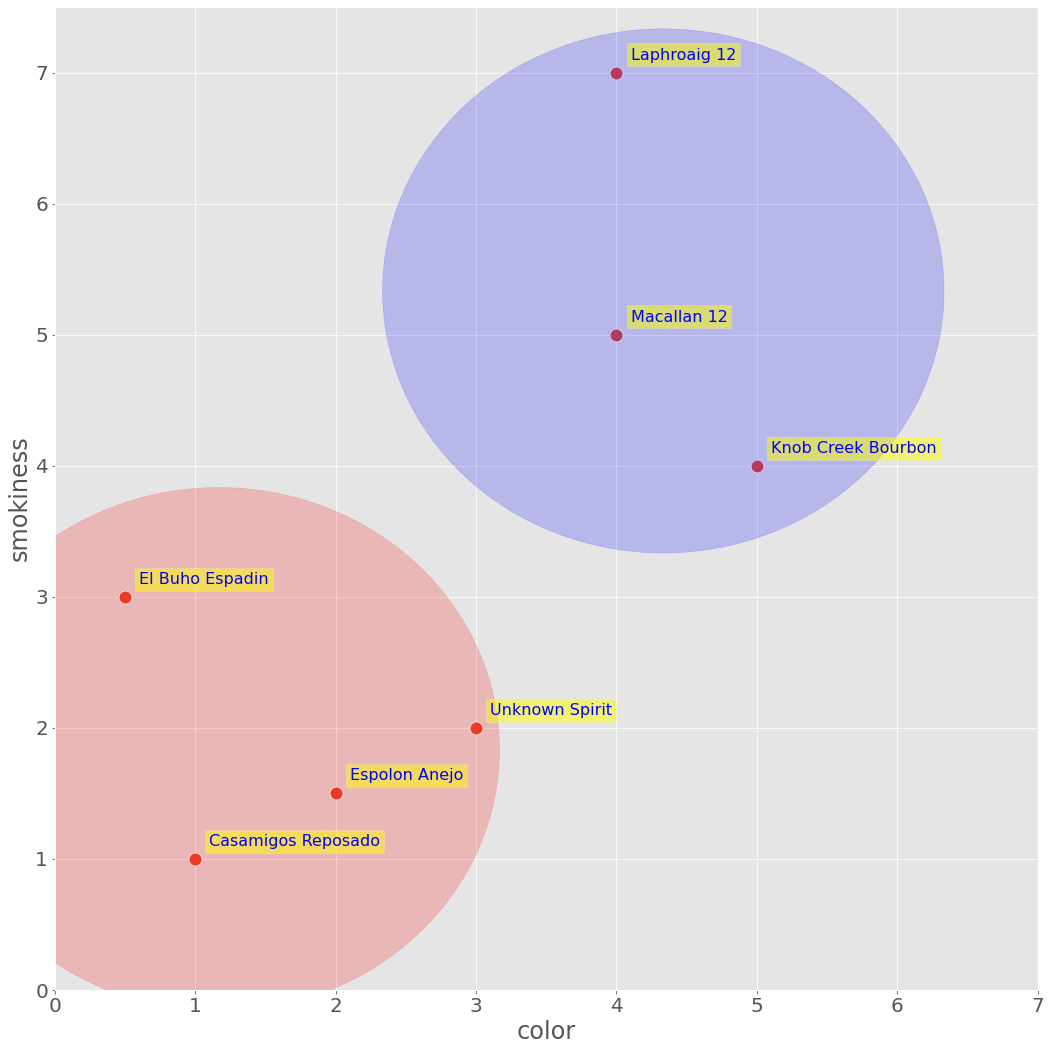

In [46]:
plot_unsupervised(spirits_df, 2,3)

In [22]:
#labels = ['Mezcal', 'Mezcal', 'Mezcal', 'Whiskey', 'Whiskey', 'Whiskey']

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(spirits_df[['smokiness', 'color']], spirits_df['type'])
neigh.predict([[3,3]])[0]

'Whiskey'

'Mezcal'